<a href="https://colab.research.google.com/github/danyssilva/ANN/blob/main/Forecasting_WebTraffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa 3:

Use as técnicas de forecasting apresentadas na aula em alguma base de dados diferente da apresentada na aula.

Lembre-se de usar uma técnica ingênua (Naïve) como baseline.

Explique a base que foi usada com poucas palavras. Justifique os parâmetros usados para gerar o dataset a partir do array.**negrito**

### Base de Dados:

Para desenvolver este trabalho foi utilizado o arquivo preprocessado da competição do Kaggle "Web Traffic Time Series Forecasting" que pode ser encontrada no link:

https://www.kaggle.com/datasets/theinkyawlwin/wikipedia/data

In [1]:
# Instalando dependêcias:
import kagglehub
import pandas as pd
import numpy as np
from kagglehub import KaggleDatasetAdapter

kagglehub.dataset_download("theinkyawlwin/wikipedia")

'/kaggle/input/wikipedia'

In [2]:
# Lendo aqruivo
df3=pd.read_csv(r"/kaggle/input/wikipedia/top_page_df.csv")

In [3]:
print(len(df3))

550


In [5]:
# Extração da coluna 'Views' como um NumPy array
visualizacoes = df3['Views'].values
print(visualizacoes)

# # Extraindo outras colunas
raw_data = df3[['Date']].values
print(raw_data)

[20.38 20.75 19.57 20.44 20.77 22.54 21.21 19.11 19.99 20.2  19.7  20.23
 20.52 19.7  19.56 19.66 18.99 18.36 18.83 20.34 19.74 19.54 19.62 18.64
 19.32 20.4  20.16 19.89 27.56 18.5  17.93 18.18 19.41 18.95 20.53 20.25
 20.06 19.12 19.44 19.71 19.85 18.37 19.39 19.19 19.45 19.31 19.68 20.31
 20.08 18.9  19.09 18.9  18.8  19.89 20.21 18.56 18.09 17.86 17.29 17.84
 18.2  20.55 18.08 18.42 17.85 17.48 17.9  19.   19.74 19.65 18.61 18.07
 18.56 18.93 19.06 19.22 19.27 18.23 18.2  17.71 17.85 19.61 20.8  18.83
 19.59 17.95 17.81 18.1  18.7  20.31 17.54 19.7  18.84 18.54 18.3  18.94
 19.28 18.27 18.84 19.05 18.44 18.94 19.12 20.29 19.56 18.8  18.82 17.87
 18.04 19.03 21.35 20.67 21.55 21.47 18.92 17.53 20.1  20.55 20.89 20.54
 18.82 18.18 18.12 17.97 21.33 21.05 20.02 19.78 18.06 17.54 18.54 20.78
 19.63 19.2  18.8  18.12 18.07 19.12 20.88 19.79 19.89 19.15 17.57 18.95
 19.46 20.56 19.45 18.82 18.14 17.9  19.15 19.28 21.37 20.1  18.21 18.57
 17.96 18.17 18.41 21.11 20.08 18.03 16.57 17.55 16

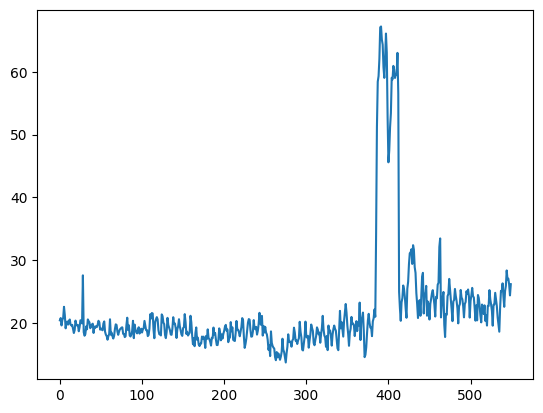

In [7]:
from matplotlib import pyplot as plt
plt.plot(range(len(visualizacoes)), visualizacoes)

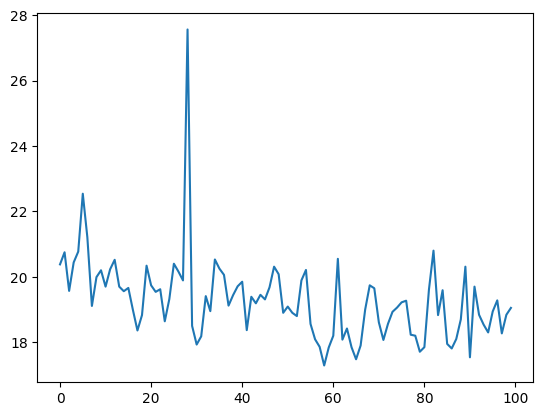

In [8]:
plt.plot(range(100), visualizacoes[:100])

In [164]:
# Separando os dados de treino, validação e testes

num_train_samples = int(0.6 * len(raw_data))
num_val_samples = int(0.2 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print('num_train_samples:', num_train_samples)
print('num_val_samples:', num_val_samples)
print('num_test_samples:', num_test_samples)

num_train_samples: 330
num_val_samples: 110
num_test_samples: 110


In [165]:
# Trabalhando com a conversão de dados do tipo data para timestamp

if not pd.api.types.is_datetime64_any_dtype(df3['Date']):
    df3['Date'] = pd.to_datetime(df3['Date'])

raw_data = df3[['Date']].values.astype(np.int64) // 10**9  # Unix timestamps

In [166]:
# Calculate mean and standard deviation using the training data
mean = raw_data[:num_train_samples].mean(axis=0, dtype=float)
std = raw_data[:num_train_samples].std(axis=0)

# Normalize the raw data
raw_data = (raw_data - mean) / std

In [167]:
print(visualizacoes.shape)
print(raw_data.shape)
print(std.shape)
print(mean.shape)

(550,)
(550, 1)
(1,)
(1,)


In [168]:
print(std)

[8230667.64728111]


In [169]:
from tensorflow import keras

In [170]:
sampling_rate = 1
sequence_length = 30
delay = sampling_rate * (sequence_length + 24 + 1)
batch_size = 256
train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=visualizacoes[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    end_index=num_train_samples
)
val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=visualizacoes[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_val_samples + num_train_samples
)
test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=visualizacoes[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_val_samples + num_train_samples
)
#

In [172]:
for samples, targets in train_dataset:
  print("samples shape:", samples.shape)
  print("targets shape:", targets.shape)
  break

samples shape: (256, 30, 1)
targets shape: (256,)


## Baseline

In [173]:
for samples, targets in val_dataset:
  print("samples shape:", samples.shape)
  print("targets shape:", targets.shape)
  break

samples shape: (81, 30, 1)
targets shape: (81,)


In [174]:
print(samples[1, 1])
print(std)

tf.Tensor([1.93675661], shape=(1,), dtype=float64)
[8230667.64728111]


In [175]:
def evaluate_naive_method(dataset):
  total_abs_err = 0
  samples_seen = 1
  for samples, targets in dataset:
    preds = samples[:, 1] * std + mean
    total_abs_err += np.sum(np.abs(preds - targets))
    samples_seen += samples.shape[0]
    print(samples_seen)
  return total_abs_err / samples_seen
print("Validation MAE (naive method):", evaluate_naive_method(val_dataset))
print("Test MAE (naive method):", evaluate_naive_method(test_dataset))


82
Validation MAE (naive method): 117438952626.05269
27
Test MAE (naive method): 36926905031.81333


In [178]:
from tensorflow import keras
from keras import layers

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
# Use Reshape instead of Flatten
x = layers.Reshape((-1, sequence_length * raw_data.shape[-1]))(inputs)
x = layers.Dense(16, activation='relu')(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("model.keras",
                                    save_best_only=True)
]

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(train_dataset,
                    epochs=20,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("model.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 423ms/step - loss: 330.0708 - mae: 18.0782 - val_loss: 1686.1602 - val_mae: 37.6129
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - loss: 319.8495 - mae: 17.7850 - val_loss: 1659.6788 - val_mae: 37.2593
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - loss: 313.9285 - mae: 17.6110 - val_loss: 1639.3191 - val_mae: 36.9851
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - loss: 308.8980 - mae: 17.4608 - val_loss: 1628.1404 - val_mae: 36.8337
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step - loss: 303.8277 - mae: 17.3051 - val_loss: 1618.8577 - val_mae: 36.7075
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - loss: 301.2755 - mae: 17.2249 - val_loss: 1610.5549 - val_mae: 36.5942
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - loss: 298.2589 - mae: 17.1290 - val_loss: 1601.4460 - val_mae: 36.4696
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 295.8758 - mae: 17.0526 - val_loss: 1594.5906 - val_mae: 36.3754
Epoch 9/20
2/2 ━━

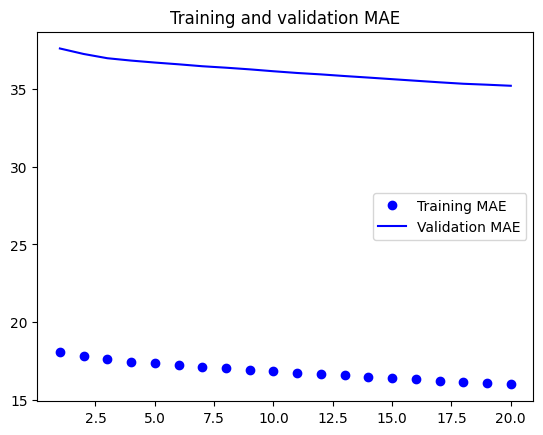

In [179]:
import matplotlib.pyplot as plt
loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.figure
plt.plot(epochs, loss, 'bo', label='Training MAE')
plt.plot(epochs, val_loss, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()
plt.show()